### Martina Crippa - 915326

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2 - SOLUTION</span>


All c++ code is stored into exercize_xx/es_xx.x.x folder, for every point of exercizes.
All data are stored into exercize_xx/data/ folder.

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

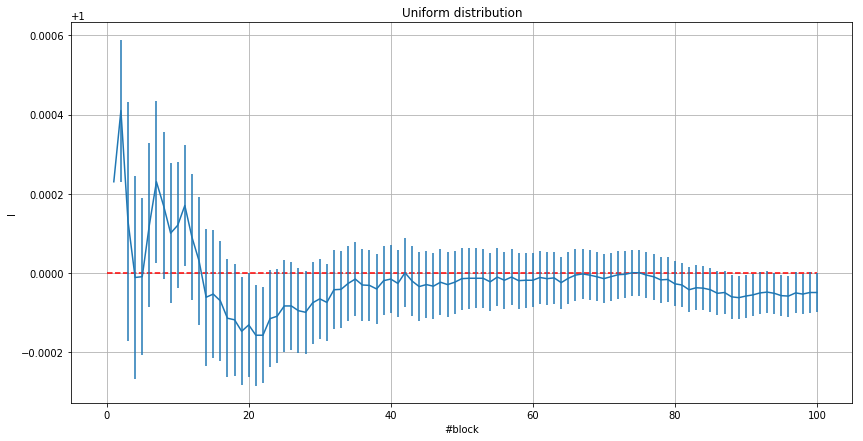

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# To read data from file
x1, y1, err_prog1 = np.loadtxt("data/output_es02.1.1.dat", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')
plt.figure(figsize=(14,7))
plt.hlines(1, 0, 100, colors='r', linestyles='dashed')
plt.errorbar(x1,y1,yerr=err_prog1)
plt.title("Uniform distribution")
plt.xlabel('#block')
plt.ylabel('I')
plt.grid(True)
plt.show()


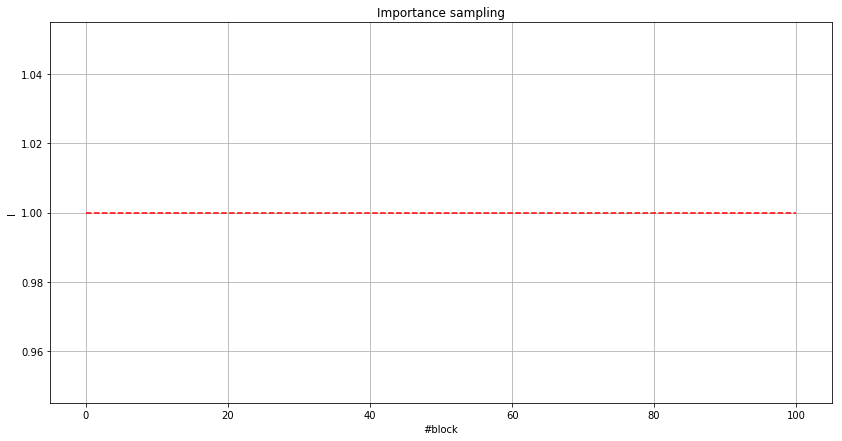

In [11]:
# To read data from file
x1, y1, err_prog1 = np.loadtxt("data/output_es02.1.2.dat", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')
plt.figure(figsize=(14,7))
plt.hlines(1, 0, 100, colors='r', linestyles='dashed')
plt.errorbar(x1,y1,yerr=err_prog1)
plt.title("Importance sampling")
plt.xlabel('#block')
plt.ylabel('I')
plt.grid(True)
plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

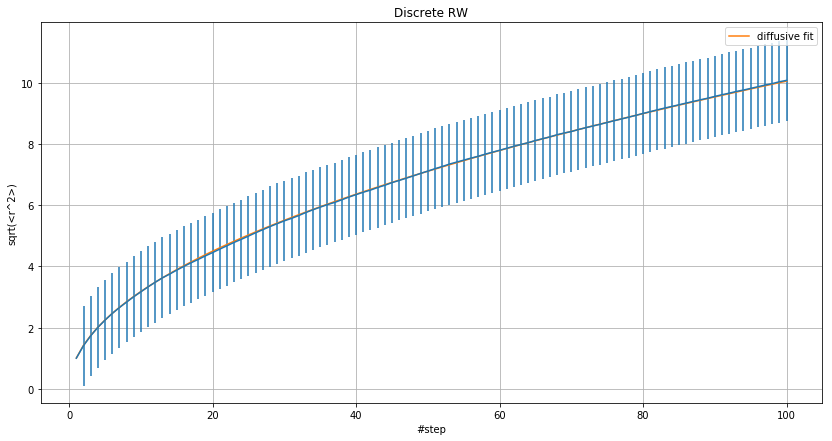

In [6]:
from scipy.optimize import curve_fit

# Defining function to optimize for fitting histograms
def diffusive(x,k):  
    return k * np.sqrt(x)

x, y, err = np.loadtxt("data/output_es02.2.1.dat", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

p_opt, p_cov = curve_fit(diffusive,x,y) 
y_fit = diffusive(x,p_opt[0])

plt.figure(figsize=(14,7))
plt.errorbar(x,y,yerr=err)
plt.plot(x,y_fit, label='diffusive fit')
plt.title("Discrete RW")
plt.xlabel('#step')
plt.ylabel('sqrt(<r^2>)')
plt.legend()
plt.grid(True)
plt.show()

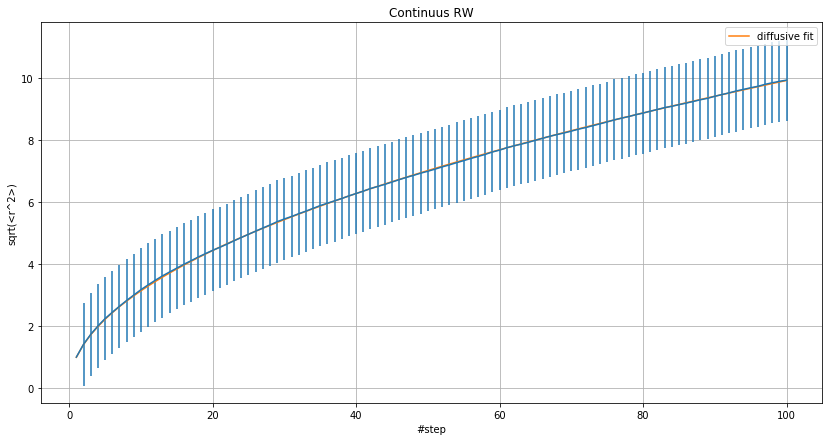

In [7]:
x, y, err = np.loadtxt("data/output_es02.2.2.dat", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

p_opt, p_cov = curve_fit(diffusive,x,y) 
y_fit = diffusive(x,p_opt[0])

plt.figure(figsize=(14,7))
plt.errorbar(x,y,yerr=err)
plt.plot(x,y_fit, label='diffusive fit')
plt.title("Continuus RW")
plt.xlabel('#step')
plt.ylabel('sqrt(<r^2>)')
plt.legend()
plt.grid(True)
plt.show()